In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'png' #svg
import pylab as plb # this notebook is for plotting
import numpy as np
import scipy as sp
import figurefirst as fifi

... add overview and an introductory use case.

You can decorate the ```svg <figurefirsrt:axis>``` tag with ```mpl.axis``` methods. For example to call:

```python
ax.axhspan(100,200,zorder=10,color ='r',alpha = 0.3)
``` 

on the axis named ```frequency.22H05.start``` use the following tag:

```xml
<figurefirst:axis
     figurefirst:name="frequency.22H05.start"
     figurefirst:axhspan="100,200,zorder=10,color='r',alpha=.3"/> ```
     
The layout.apply_mpl_methods function will then apply the methods passing the value of the svg atribute as arguments to the ```mpl.axis``` method.

In [20]:
#Passing axis methods
import numpy as np
layout = FigureLayout('axis_methods_layout.svg')
layout.make_mplfigures()
layout.fig.set_facecolor('None')
for mplax in layout.axes.values():
    ax = mplax['axis']
    ax.plot(np.arange(30),np.random.rand(30),color = 'k')
    mpl_functions.adjust_spines(ax,'none', 
                  spine_locations={}, 
                  smart_bounds=True, 
                  xticks=None, 
                  yticks=None, 
                  linewidth=1)
    ax.patch.set_facecolor('None')
layout.apply_mpl_methods(layout.fig)
layout.insert_figures('mpl_panel_a')
layout.write_svg('axis_methods_test_output.svg')
close('all')

It is also possible to add figurefirst attributes to groups. Providing the figurefirsrt:groupname = "mygroup" attribute will cause the enclosed figurefirst:axes elements to be added to the layout.axes_groups dictionary keyed by groupname, and then axis name. For instance, if the follwing group exists in svg:

```xml
  <g
       style="display:inline"
       transform="matrix(0.88667385,0,0,0.84804291,-1.1136586,117.0766)"
       id="g3965-1"
       figurefirst:groupname="oval">
       <rect
         y="34.986671"
         x="70.899071"
         height="42.857143"
         width="594.55908"
         id="rect2985-3-0"
         style="fill:#008000">
        <figurefirst:axis
           figurefirst:name="circadian" />
        </rect>
   </g>
```
python will expose the axis in the dictionary axis groups attached to the layout keyed by group name and axis name.
```python
layout.axes_groups['oval']['circadian']['axis']
``` 
All axes that are not included in a group  will be collected into the field
```python
layout.axes_groups['none']
```

In [18]:
#Group axes example
layout = FigureLayout('group_axes_layout.svg')
layout.make_mplfigures()
layout.insert_figures()
layout.write_svg('group_axes_test_output.svg')
close('all')

In [19]:
#Groups and figures example
layout = FigureLayout('multi_figures_layout.svg')
mplfig = layout.make_mplfigures()
layout.append_figure_to_layer(layout.figures.values()[0],'mpl_layer_2')
layout.append_figure_to_layer(layout.figures.values()[1],'mpl_layer_3')
layout.append_figure_to_layer(layout.figures.values()[2],'mpl_layer_4')
layout.write_svg('multi_fig_test_output.svg')
close('all')

In [70]:
group.keys()

[u'cond_3', u'cond_2', u'cond_1', u'cond_4']

In [42]:
# collect some data
groupA_mean = 1.5
groupA_sigma = 1.0
groupB_mean = 0.3
groupB_sigma = 0.6
c1_effect = 0.3
c2_effect = 2.0
c3_effect = 0.0
c4_effect = 0.0

data = dict()

N = 500
T = 1.
Delta = T/N
for group_name,group_mean,group_sigma in zip(['A','B'],
                                             [groupA_mean,groupB_mean],
                                             [groupA_sigma,groupB_sigma]):
    data[group_name] = dict()
    for cond_name,cond_effect in zip(['cond_1','cond_2','cond_3','cond_4'],
                                     [c1_effect,c2_effect,c3_effect,c4_effect]):
        data[group_name][cond_name] = list()
        for trial in range(10):
            W = np.zeros(N+1)
            t = np.linspace(0, T, N+1);
            W[:N+1] = cond_effect + group_mean + np.cumsum(np.sqrt(Delta) *
                                                            np.random.standard_normal(N+1) *
                                                            group_sigma)
            t = np.linspace(0, T, N+1);
            data[group_name][cond_name].append(W)

In [43]:
def kill_spines(ax):
    return fifi.mpl_functions.adjust_spines(ax,'none', 
                  spine_locations={}, 
                  smart_bounds=True, 
                  xticks=None, 
                  yticks=None, 
                  linewidth=1)

0.68627451
0.68627451


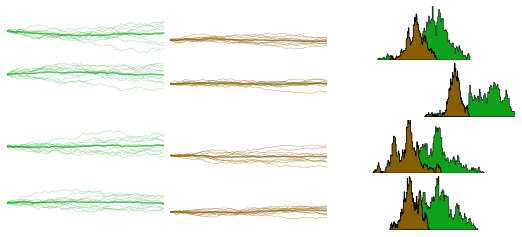

In [99]:
reload(fifi)
layout = fifi.FigureLayout('pathspec_layout.svg')
mplfig = layout.make_mplfigures()
layout.load_pathspecs()
for group_name,group in layout.axes_groups.items():
    if not(group_name == 'summary'):
        for cond_name,cond_ax in group.items():
            group_letter = group_name.split('group')[1]
            kwargs = layout.pathspecs['trial_%s'%group_letter].mplkwargs()
            cond_ax['axis'].plot(np.array(data[group_letter][cond_name]).T,**kwargs)
            
            kill_spines(cond_ax['axis'])
            kwargs = layout.pathspecs['mean_%s'%group_letter].mplkwargs()
            cond_ax['axis'].plot(np.mean(np.array(data[group_letter][cond_name]).T,axis = 1)
                                 ,**kwargs)
            cond_ax['axis'].set_ybound(-2,5)
    else:
        group_letter = 'A'
        kwargs = layout.pathspecs['hist%s'%group_letter].mplkwargs()
        for cond_name,cond_ax in group.items():
            cond_ax['axis'].hist(np.array(data[group_letter][cond_name]).ravel(),
                                 bins = 100,histtype = 'stepfilled',**kwargs)
            cond_ax['axis'].set_xbound(-2,5)
            kill_spines(cond_ax['axis'])
        group_letter = 'B'
        kwargs = layout.pathspecs['hist%s'%group_letter].mplkwargs()
        for cond_name,cond_ax in group.items():
            cond_ax['axis'].hist(np.array(data[group_letter][cond_name]).ravel(),
                                 bins =100,histtype = 'stepfilled',**kwargs)
            cond_ax['axis'].set_xbound(-2,5)
            kill_spines(cond_ax['axis'])

In [104]:
kw = layout.pathspecs['hist%s'%'A'].mplkwargs()

0.68627451


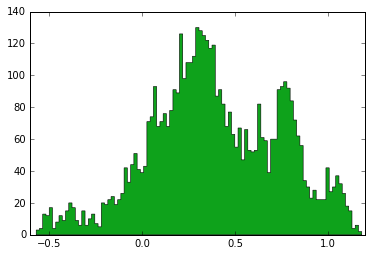

In [105]:
lns = plb.hist(np.array(data[group_letter][cond_name]).ravel(),
                                 bins =100,histtype = 'stepfilled',**kw)

In [83]:
import matplotlib
converter = matplotlib.colors.ColorConverter()

In [95]:
converter.to_rgba('#0ea21b',0.3)

(0.054901960784313725, 0.6352941176470588, 0.10588235294117647, 0.3)

In [85]:
layout.pathspecs['#0ea21b']

{u'd': u'm 402.84119,260.16175 c 26.63268,-1.04543 30.33166,-35.54452 44.38779,-48.08963 14.05614,-12.54513 25.10428,-9.25902 35.51023,8.36342 13.60672,23.04291 33.29087,37.63536 33.29087,37.63536',
 u'id': u'path4373',
 u'inkscape:connector-curvature': u'0',
 u'sodipodi:nodetypes': u'cssc',
 u'style': u'fill:#0ea21b;fill-opacity:0.68627451;fill-rule:evenodd;stroke:#000000;stroke-width:0.55703616;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1'}

In [38]:
layout.pathspecs.keys()

[u'histA', u'histB', u'trial_B', u'mean_A', u'mean_B', u'trial_A']

In [30]:
class ffaxis(plb.axes):
    __ 

['mplmethods', 'data', 'axis']

In [77]:
layout.pathspecs.keys()

[u'histA', u'histB', u'trial_B', u'mean_A', u'mean_B', u'trial_A']

In [93]:
plb.plot([1,2,3,4],**kwargs)

Error in callback <function post_execute at 0x7f42e0fbf9b0> (for post_execute):


TypeError: a float is required

TypeError: a float is required